In [5]:

from google.colab import files
uploaded = files.upload()


Saving archive (1).zip to archive (1) (1).zip


In [6]:
import zipfile
import os

with zipfile.ZipFile('archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/iris_data')
os.listdir('/content/iris_data')


['IRIS.csv']

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [9]:

df = pd.read_csv('/content/iris_data/IRIS.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.columns = df.columns.str.strip()


print("✅ Columns:", df.columns.tolist())


df.head()

✅ Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:

if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)


df.info()


target_column = 'Species' if 'Species' in df.columns else df.columns[-1]
print("\n📊 Species Count:\n", df[target_column].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

📊 Species Count:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


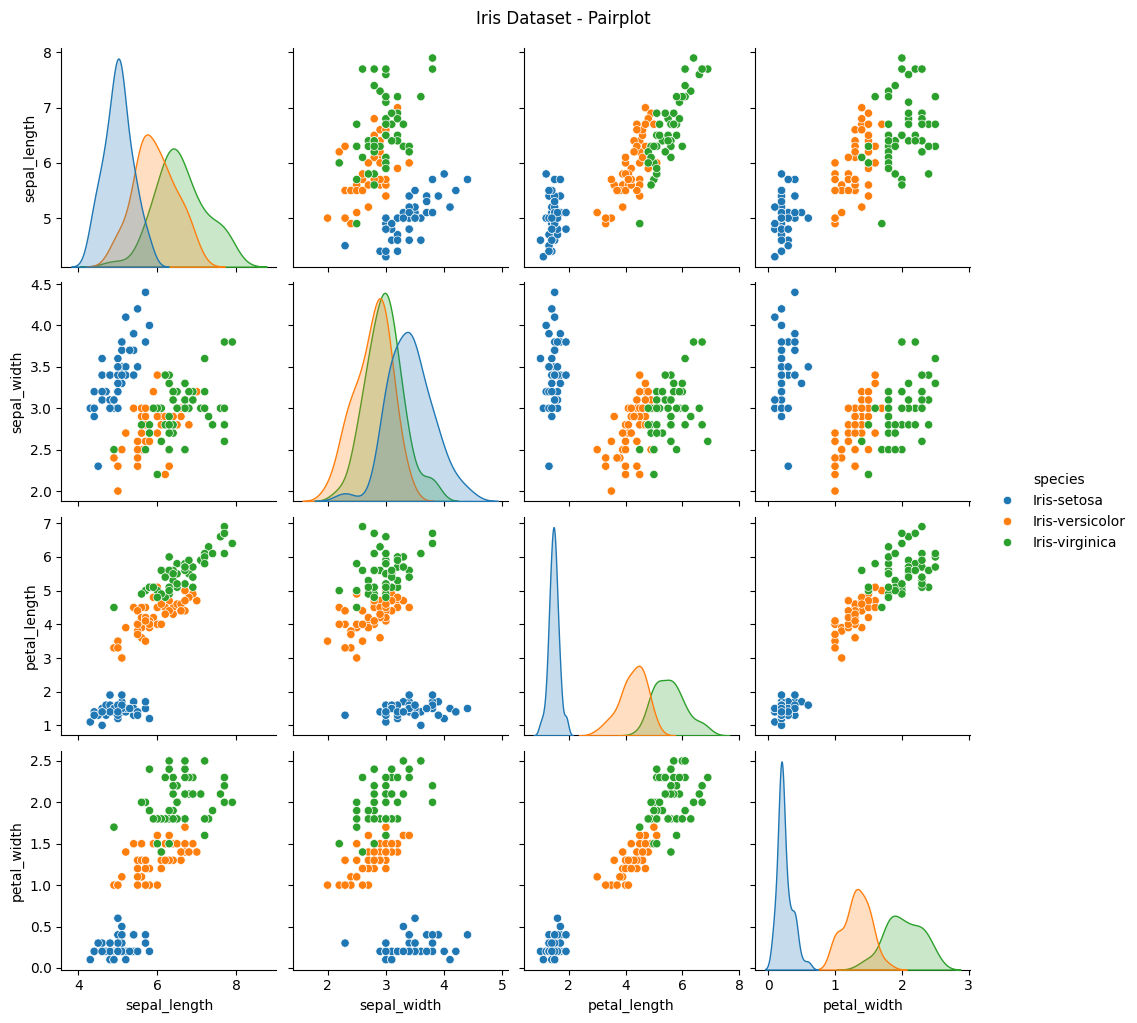

In [14]:

sns.pairplot(df, hue=target_column)
plt.suptitle("Iris Dataset - Pairplot", y=1.02)
plt.show()


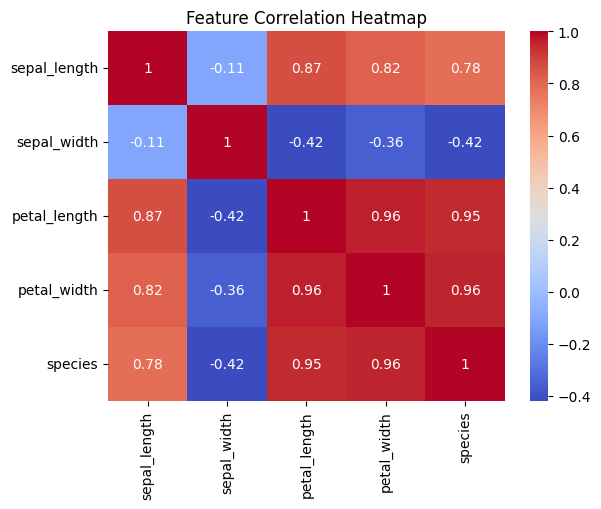

In [16]:

le = LabelEncoder()
df[target_column] = le.fit_transform(df[target_column])

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:

X = df.drop(target_column, axis=1)
y = df[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [19]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.0

📊 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:

sample = np.array([[6.0, 3.0, 4.8, 1.8]])
predicted_class = le.inverse_transform(model.predict(sample))
print("🔍 Predicted Class for Sample:", predicted_class[0])


🔍 Predicted Class for Sample: Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
import joblib
joblib.dump(model, "iris_model.pkl")


['iris_model.pkl']